In [11]:
import tensorflow as tf
from tensorflow.python.client import device_lib 
from tensorflow.python.client import device_lib

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [13]:
import IPython.display as display

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

np.set_printoptions(suppress=True)

In [14]:
# import the needed packages
import matplotlib.image as img
from tensorflow import keras
# shortcut to the ImageDataGenerator class
ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

In [15]:
path='./dataset'
data_dir=pathlib.Path(path)

In [16]:
tf.test.is_gpu_available(
    cuda_only=False, min_cuda_compute_capability=None
)

True

In [17]:
path="D:\CODE\CNN\\final_project\\finalCNN\dataset"
data_dir=pathlib.Path(path)
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

47127

In [18]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*')])
CLASS_NAMES

array(['cars', 'cats', 'dogs', 'flowers', 'human', 'motobikes'],
      dtype='<U9')

In [19]:
image_generator=ImageDataGenerator(rescale=1./255)

In [9]:
BATCH_SIZE = 32
IMG_HEIGHT = 256
IMG_WIDTH = 256
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [20]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 47127 images belonging to 6 classes.


In [22]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

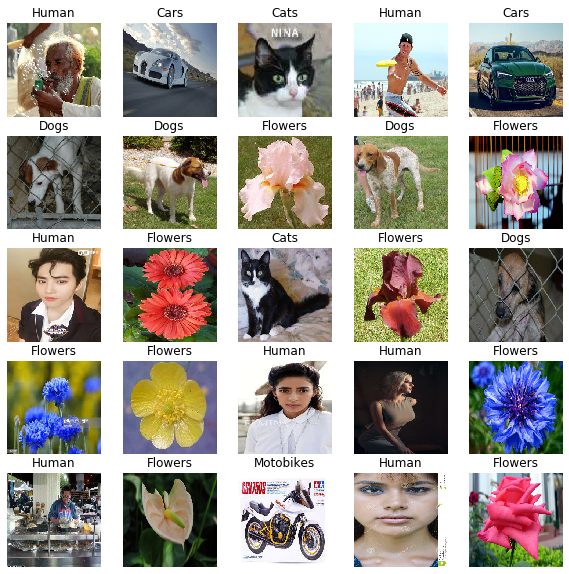

In [23]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [24]:
imgDataGen=ImageDataGenerator(
    validation_split=0.2,
    rescale=0.2,
    horizontal_flip=True,
    zoom_range=0.3,
    rotation_range=15.,
)

In [25]:
train_dataset = imgDataGen.flow_from_directory(
    directory=str(data_dir),
    target_size = (IMG_HEIGHT, IMG_WIDTH), 
    classes = list(CLASS_NAMES),
    batch_size = BATCH_SIZE,
    subset = 'training'
)

val_dataset = imgDataGen.flow_from_directory(
    directory=str(data_dir),
    target_size = (IMG_HEIGHT, IMG_WIDTH), 
    classes = list(CLASS_NAMES),
    batch_size =BATCH_SIZE,
    subset = 'validation'
)

Found 42417 images belonging to 6 classes.
Found 4710 images belonging to 6 classes.


In [53]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(IMG_WIDTH,IMG_HEIGHT,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=6, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 30, 128)      

In [54]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adamax(lr=0.001),
              metrics=['acc'])

In [55]:
history=model.fit_generator(
    train_dataset, 
    validation_data = val_dataset,
    workers=10,
    epochs=20,
)

Epoch 1/20
932/932 [==============================] - 280s 300ms/step - loss: 0.3757 - acc: 0.8832 - val_loss: 0.2789 - val_acc: 0.9091
Epoch 2/20
932/932 [==============================] - 318s 342ms/step - loss: 0.1953 - acc: 0.9183 - val_loss: 0.1452 - val_acc: 0.9108
Epoch 3/20
932/932 [==============================] - 261s 280ms/step - loss: 0.1693 - acc: 0.9294 - val_loss: 0.2001 - val_acc: 0.9241
Epoch 4/20
932/932 [==============================] - 262s 281ms/step - loss: 0.1527 - acc: 0.9363 - val_loss: 0.1867 - val_acc: 0.9317
Epoch 5/20
932/932 [==============================] - 261s 280ms/step - loss: 0.1396 - acc: 0.9430 - val_loss: 0.1349 - val_acc: 0.9427
Epoch 6/20
932/932 [==============================] - 262s 281ms/step - loss: 0.1281 - acc: 0.9475 - val_loss: 0.1213 - val_acc: 0.9464
Epoch 7/20
932/932 [==============================] - 263s 283ms/step - loss: 0.1167 - acc: 0.9526 - val_loss: 0.1988 - val_acc: 0.9482
Epoch 8/20
932/932 [============================

In [1]:
def plot_history(history, yrange):
    '''Plot loss and accuracy as a function of the epoch,
    for the training and validation datasets.
    '''
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))

    # Plot training and validation accuracy per epoch
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.ylim(yrange)
    
    # Plot training and validation loss per epoch
    plt.figure()

    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    
    plt.show()

In [56]:
import h5py
from keras.models import load_model
model.save('trained-model.h5')

In [40]:
model_new=tf.keras.models.load_model('trained-model.h5')
model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 128)      